USING DEVICE: cuda


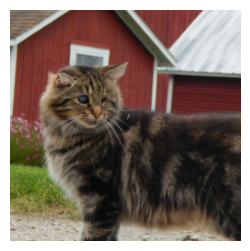

In [1]:
import PIL
import torchvision.transforms.v2 as transforms
import matplotlib.pyplot as plt
import torch

from ssdd import SSDD

# Check available devices
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("USING DEVICE:", device)

def show_img(img):
    img = ((img + 1) / 2).squeeze(0).permute(1, 2, 0).cpu().numpy().clip(0, 1)
    plt.figure(figsize=(3, 3))
    plt.tight_layout(pad=0)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

def preprocess(img, size=256):
    tr = transforms.Compose(
        [
            transforms.ToImage(),
            transforms.ToDtype(torch.float32, scale=True),
            transforms.Normalize([0.5], [0.5]),
            transforms.Resize(size, interpolation=transforms.InterpolationMode.BILINEAR),
            transforms.CenterCrop(size),
        ]
    )
    img = tr(img)
    return img.unsqueeze(0).to(device)

# Load image
demo_img = PIL.Image.open("figures/cat.jpg").convert("RGB")
demo_img = preprocess(demo_img)

show_img(demo_img)


# Reconstruction using a pre-trained model

In [2]:
# Build an SSDD model
model = SSDD(
    encoder="f8c4",
    decoder="M",
    checkpoint="weights/demo_f8c4_M_128.safetensors",
)
model = model.to(device).eval()

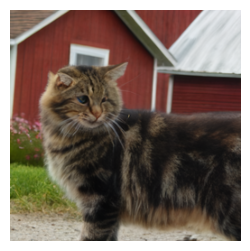

In [3]:
# Reconstruct
reconstructed = model(demo_img, steps=8)

show_img(reconstructed)

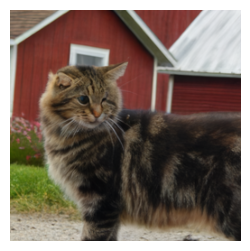

In [4]:
# Encode into latent z
z = model.encode(demo_img).mode()
# Decode from latent z
reconstructed = model.decode(z, steps=8)

show_img(reconstructed)